In [1]:
# For numeric opreations
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt

# Main deep learning library
import tensorflow as tf

# For image data augumentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To create sequential model
from tensorflow.keras.models import Sequential

# Import layers
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D , Conv2D , MaxPooling2D , Flatten

# Different neural network layers
from tensorflow.keras.optimizers import Adam

# Callbacks for training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# For download dataset from kagglehub
import kagglehub

# For handling files path
import os

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("umitka/chest-x-ray-balanced")

print("Path to dataset files:", path)

100%|██████████| 6.90G/6.90G [05:29<00:00, 22.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/umitka/chest-x-ray-balanced/versions/1


In [3]:
# Listing all files from main dataset
print(os.listdir(path))

# Listing all files inside chest xray balanced directory
print(os.listdir(path + "/chest_xray_balanced"))

['chest_xray_balanced']
['test', 'train', 'val']


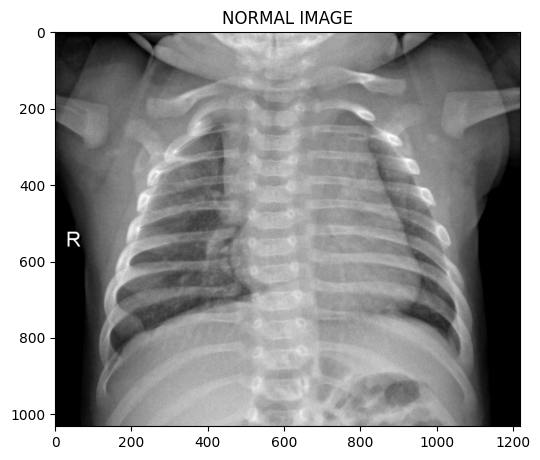

In [ ]:
# Constructing the path to the folder containing normal chest x_ray images
image_folder = os.path.join(path , "chest_xray_balanced" , "train" , "NORMAL")

# Selecting 8 image from the folder
image_file = os.listdir(image_folder)[7]

# Combine full path
image_path = os.path.join(image_folder , image_file)

try:

    # Opening image using PIL
    img = Image.open(image_path)

    # Show images using matplotlib
    plt.figure(figsize=(6,6))
    plt.imshow(img , cmap="gray")
    plt.title("NORMAL IMAGE")
    plt.axis="off"
    plt.show()

except Exception as e:
   print(f"YOU HAVE PROBLEM IN THE LOADING{e}")


In [6]:
# Display helthy and sick peoples from dataset

train_hel = os.listdir(path + "/chest_xray_balanced/train/NORMAL")
train_sick = os.listdir(path + "/chest_xray_balanced/train/PNEUMONIA")
test_hel = os.listdir(path + "/chest_xray_balanced/test/NORMAL")
test_sick = os.listdir(path + "/chest_xray_balanced/test/PNEUMONIA")
val_hel = os.listdir(path + "/chest_xray_balanced/val/NORMAL")
val_sick = os.listdir(path + "/chest_xray_balanced/val/PNEUMONIA")

print("Length of healthy peoples into train folder :....." , len(train_hel))
print("Length of unhealthy peoples into train folder :......" , len(train_sick))

print("\nLength of helthy peoples into test folder :..." , len(test_hel))
print("Length of unhelthy peoples into test folder :....." , len(test_sick))

print("\nLength of helthy peoples into val folder :...." ,len(val_hel))
print("Length of unhelthy peoples into val folder :...." , len(val_sick))

Length of healthy peoples into train folder :..... 4000
Length of unhealthy peoples into train folder :...... 4000

Length of helthy peoples into test folder :... 400
Length of unhelthy peoples into test folder :..... 400

Length of helthy peoples into val folder :.... 400
Length of unhelthy peoples into val folder :.... 400


In [ ]:
from PIL import Image
# Constructing full path to the first image from normal dataset
image_path = path + "/chest_xray_balanced/train/NORMAL/" + os.listdir(path + "/chest_xray_balanced/train/NORMAL")[0]

# Open image
img = Image.open(image_path)

# Print image size
print("Image size" , img.size)

Image size (1914, 1586)


In [ ]:
from sklearn.utils import validation

# Create an image that rescale pixels values to 0-1
data_gen = ImageDataGenerator(
                              rescale=1./255.0
                              )

In [ ]:
# Normalize image pixels to range 0-1
train_data = data_gen.flow_from_directory(

                                        path + "/chest_xray_balanced/train",
                                         target_size=(150 , 150),
                                         batch_size = 32,
                                         class_mode = "binary"

                                         )

Found 8000 images belonging to 2 classes.


In [ ]:
# Normalize image pixels to range 0-1 of testing data
test_data = data_gen.flow_from_directory(

                                         path + "/chest_xray_balanced/test",
                                         target_size=(150 , 150),
                                         batch_size = 32,
                                         class_mode = "binary",
                                         shuffle = False

                                         )

Found 800 images belonging to 2 classes.


In [ ]:
# Normalize image pixels to range 0-1 of validation data
val_data = data_gen.flow_from_directory(
                                         path + "/chest_xray_balanced/val",
                                         target_size=(150 , 150),
                                         batch_size = 32,
                                         class_mode = "binary",
                                         shuffle=False

                                         )

Found 800 images belonging to 2 classes.


In [ ]:
# Creating a CNN model
model = Sequential([

                    # First convolutional layer with 64 filters and kernal and relu activation
                    Conv2D(64 , (3,3) , activation="relu" , input_shape=(150 , 150 , 3)),
                    # Maxpooling2D layer to reduce spatial dimensions
                    MaxPooling2D(3,3),

                    Conv2D(128 , (3,3) , activation="relu"),
                    MaxPooling2D(3,3),

                    Conv2D(215, (3,3), activation='relu'),
                    MaxPooling2D(3,3),

                    # Flattening 3D feature maps to 1D vector
                    Flatten(),

                    # Fully connected layer
                    Dense(128 , activation = "relu"),
                    Dropout(0.5),

                    Dense(1 , activation="sigmoid")

                   ])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint

# Compile to the model
model.compile(

              optimizer = "adam",
              loss="binary_crossentropy",
              metrics = ["accuracy"]
)

# Displaying the summary of model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 215)    │       247,895 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 215)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3440)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       440,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 764,120 (2.91 MB)

 Trainable params: 764,120 (2.91 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stop = EarlyStopping(verbose=1 , monitor="val_loss" , patience=1)


# Train model on training data
history = model.fit(

                    train_data,
                    validation_data=val_data,
                    epochs=2,
                    verbose=1  ,
                    callbacks=[early_stop],

                    )

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 179s 691ms/step - accuracy: 0.7571 - loss: 0.4565 - val_accuracy: 0.9262 - val_loss: 0.2302
Epoch 2/2
250/250 ━━━━━━━━━━━━━━━━━━━━ 160s 639ms/step - accuracy: 0.9325 - loss: 0.1687 - val_accuracy: 0.9075 - val_loss: 0.2277


In [ ]:
# Evaluate model on testdata data
test_loss , test_acc = model.evaluate(test_data)

# Print model accuracy
print("Accuracy" , test_acc)

# Print model loss
print("Loss" , test_loss)

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.8701 - loss: 0.3415
Accuracy 0.90625
Loss 0.24423709511756897


In [ ]:
test_data.reset()

In [ ]:
from sklearn.metrics import classification_report , confusion_matrix

# Numbers of steps convert all test images based on the batch size
STEPS = test_data.n // test_data.batch_size + 1

# Predicting raw probabilities for all test images
Y_pred_raw = model.predict(test_data, steps=STEPS)

# Converting probabilities to binary label using 0.6 threshold
Y_pred = (Y_pred_raw > 0.6).astype(int)

# Getting true label from the test data
Y_true = test_data.classes[:len(Y_pred)]

# Showing classification report
print("Classification Report" , classification_report(Y_true , Y_pred , target_names=["NORMAL", "PNEUMONIA"]))

# Showing confusion metrix
print("\nConfusion Matrix" , confusion_matrix(Y_true , Y_pred))

26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 557ms/step
Classification Report               precision    recall  f1-score   support

      NORMAL       0.94      0.89      0.92       400
   PNEUMONIA       0.90      0.94      0.92       400

    accuracy                           0.92       800
   macro avg       0.92      0.92      0.92       800
weighted avg       0.92      0.92      0.92       800


Confusion Matrix [[357  43]
 [ 22 378]]


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


In [ ]:
import tensorflow as tf

# Set model name
MODEL_FILENAME = "chest_xray_model.keras"

# Saving model
model.save(MODEL_FILENAME)

print("\nYou model save succesfully.....{MODEL_FILENAME}")


You model save succesfully.....{MODEL_FILENAME}
